# Forward Step Wise Variable Selection for Dummies

In [251]:
# Import status
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
import numpy as np

# import for matplotlib
import matplotlib.pyplot as plt

In [132]:
# Read in basetable_ex2_4
df = pd.read_csv("https://raw.githubusercontent.com/TangoMango223/schulich_MBAN6110/main/forward_stepwise_example/basetable_ex2_4.csv")

In [133]:
# Check dataframe
df.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1


In [134]:
# Algorithm for AUC and forward pass step forward model
# Assume you understand the logic already.

# Requirements:
# A function to calculate AUC
# A function to return the "next_best", or the highest AUC. 
# A loop to go thru this, and remove that next_best

In [135]:
# Define the AUC score function
# Takes in the data source table - basetable, variables and target

def auc(variables, target, basetable):

    # Define the variables for initialization
    X = basetable[variables]
    y = basetable [target]

    # Train the logistic regression model
    logreg = linear_model.LogisticRegression()

    # Fit the model. Has been trained
    logreg.fit(X,y)

    # Create predictions from X. Technically there should be a train-test split, but whatever...
    # We take the entire basetable variables, which is X, and then we take all of whatever is in 2nd Column, or "1"
    # Why do we do that --> predictions give an array of results (A,B), where A is a num if Target = 0 
    # B where num if Target = 1 - what we are looking for!! 

    predictions = logreg.predict_proba(X)[:,1]

    # Calculate AUC score. Need true y and the predictions
    auc_score = roc_auc_score(y, predictions)

    return auc_score

In [136]:
# Use the AUC score function
# note that df is the "base table".
# Our AUC function works!

call = auc(["gender_F","country_USA"], ["target"], df)
call

/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.519594279083611

In [137]:
# Calculate Next Best function.
# This function is critical, it will loop thru and select the best one

def next_best(current_variables, candidate_variables, target, basetable):

    # Set up.
    best_auc = -1 # Pick an initialization lower than 0. Otherwise the evaluation step will not work.
    best_variable = None

    # Loop thru the candidate variables given the current ones..
    # Remember, current variables tracks whatever is in the "set" of model variables selected for the model. Thru the logic.

    # The evaluation, one by one:
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        
        # The most important step - check if AUC is better or higher.
        # This will only update if it's actually better...
        if auc_v > best_auc:
            best_auc = auc_v  # Update the best AUC
            best_variable  = v
        
    return best_variable

In [138]:
# Test it works
current_variables = ["age", "gender_F"] # They passed the test, are already in the model set
candidate_variables = ["min_gift", "max_gift", "mean_gift"]

next_variable = next_best(current_variables, candidate_variables, ["target"], df)
next_variable


/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'max_gift'

In [139]:
# Create the looping process now

current_variables = [] # They passed the test, are already in the model set
candidate_variables = ["min_gift",  "max_gift", "mean_gift", "age", "gender_F", "country_USA", "income_low"]

# Limit the total iterations:
max_iterations = 5
num_iterations = min(max_iterations, len(candidate_variables))

# Looping process
for i in range (0,num_iterations):
    # Pick the next_best from a list of the candidate variables
    next_var_selection = next_best(current_variables, candidate_variables, ["target"], df)

    # Update and add the best one to the current_variables list
    current_variables.append(next_var_selection)

    # Remove from candidate list and continue the process
    candidate_variables.remove(next_var_selection)


/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [140]:
# Test that it works
call = auc(current_variables, ["target"], df)
print(call)

0.7155429426932984


/Users/christine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
# Important step is to check correlations...
correlation = np.corrcoef(df["min_gift"], df["mean_gift"])[0,1]
print(round(correlation,2))

# Just like how df.corr() checks Pearson-R for linear correlation, there is also np.corrcoef


0.76


# Partition in Python

In [142]:
# Why we do partition?
# Split training and testing variables
# This reduces overfitting, and the testing dataset will be 

In [143]:
# Import packages
from sklearn.model_selection import train_test_split # this will help us 

In [144]:
# Set up:
X = df.drop("target", axis = 1)
y = df["target"]

# Train/test split
# stratify on the "y" , which is target. Equal split.
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.4, stratify= y)

# Concat the df:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)


In [145]:
# Import
# Load the partitioning module
from sklearn.model_selection import train_test_split

In [146]:
# Create DataFrames with variables and target
X = df.drop(["target"], axis = 1)
y = df["target"]

# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Last part is checking

# Check whether train and test have same percentage targets
print(round(sum(train["target"])/len(train), 2))
print(round(sum(test["target"])/len(test), 2))

0.05
0.05


In [147]:
# Calculate AUC as well:

# # Load the partitioning module
# from sklearn.model_selection import train_test_split

# # Create DataFrames with variables and target
# X = df.drop('target', 1)
# y = basetable["target"]

# # Carry out 70-30 partititioning with stratification
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# # Create the final train and test basetables
# train = pd.concat([X_train, y_train], axis=1)
# test = pd.concat([X_test, y_test], axis=1)

#  # Apply the auc_train_test function
# auc_train, auc_test = auc_train_test(["age", "gender_F"], ["target"], train, test)
# print(round(auc_train,2))
# print(round(auc_test,2))

In [148]:
# # Plot the AUC curves:

# # Keep track of train and test AUC values
# auc_values_train = []
# auc_values_test = []
# variables_evaluate = []

# variables = ['max_gift',
#  'time_since_last_gift',
#  'number_gift',
#  'mean_gift',
#  'income_high',
#  'age',
#  'gender_F',
#  'time_since_first_gift',
#  'income_low',
#  'country_UK']

# # Iterate over the variables in variables
# for v in variables:
  
#     # Add the variable
#     variables_evaluate.append(v)
    
#     # Calculate the train and test AUC of this set of variables
#     auc_train, auc_test = auc_train_test(variables_evaluate, ["target"], train, test)

#     # The auc_train_test function has the following:  auc_train_test(variables, target, train, test)
    
#     # Append the values to the lists
#     auc_values_train.append(auc_train)
#     auc_values_test.append(auc_test)
    
# # Make plot of the AUC values
# import matplotlib.pyplot as plt
# import numpy as np

# # Graphing code explained

# # Create the numbers from 0 to 9 for the plot
# x = np.array(range(0,len(auc_values_train)))

# # Plot each curve. You need to convert auc_values_train and auc_values_test, since they're in list format, same numbers
# y_train = np.array(auc_values_train)
# y_test = np.array(auc_values_test)

# # Plot as needed
# plt.xticks(x, variables, rotation = 90) # variables has the same, x-ticks allows for equal plotting mapping
# plt.plot(x,y_train)
# plt.plot(x,y_test)
# plt.ylim((0.6, 0.8))
# plt.show()

In [149]:
# Code to plot Cumulative Gains:

# # Import the matplotlib.pyplot module 
# import matplotlib.pyplot as plt

# # Import the scikitplot module
# import scikitplot as skplt

# # Plot the cumulative gains graph
# skplt.metrics.plot_cumulative_gain(targets_test, predictions_test)
# plt.show()

In [150]:
# Cumulative Gains curve

# # Import the modules
# import random
# import matplotlib.pyplot as plt
# import scikitplot as skplt

# # Generate random predictions
# random_predictions = [random.uniform(0,1) for _ in range(len(targets_test))]

# # Adjust random predictions
# random_predictions = [(r, 1 - r) for r in random_predictions]

# # Plot the cumulative gains graph
# skplt.metrics.plot_cumulative_gain(targets_test, random_predictions)
# plt.show()

In [151]:
# Profit estimation

# Metrics
population_size = 100000
target_incidence = 0.05
reward_target = 50
cost_campaign = 2


# perc_selected = 0.2 # We are targetting top 20% of all donors
# perc_targets = 0.1

# Function
def profit(perc_targets, perc_selected, population_size, reward_target, cost_campaign):

    # We are mailing everyone in the population size of 100,000 people. 
    # Although we know the average incidence rate is 5%, it doesn't mean that it's consistently 5%, for example, top 20% of people might be donors at a higher rate
    cost = cost_campaign * perc_selected * population_size
    print(cost)

    # Calculate the reward
    reward = reward_target * perc_targets * perc_selected * population_size
    print(reward)

    # Return
    return (reward - cost)


# Remember, the target incidence rate tells you NOTHING
# It is the average target rate where t = 1
#  What you care about is, at different probabilities or different top percentages, what the containment of the target % is

# For example, average incident rate may be 5% across all groups
# Let's say donors rate
# It doesn't mean 



In [152]:
# top 20% of donors
perc_selected = 0.2
lift = 2

# This means 2 x 5% means 10% of targets will be actually reached, not 5%
perc_targets = target_incidence * lift # in the population of the top 20%, we actually achieve realization of 2.5 x 5%
print(perc_targets)

print(profit(perc_targets, perc_selected, population_size, reward_target, cost_campaign))

0.1
40000.0
100000.0
60000.0


In [153]:
expected_donors = (1000000 * 0.02)
print(expected_donors)
perc_targets = 16000 / expected_donors
perc_targets

20000.0


0.8

# Discretization of Continous Variables in Python

In [154]:
# Example of discretization in Python

variable = "max_gift" # this is in the df data
number_bins = 3 # desired groupings

df["disc_max_gift"] = pd.qcut(df[variable], number_bins)

In [155]:
# View later
df["disc_max_gift"].value_counts()

len(df["disc_max_gift"].value_counts())

3

In [156]:
df.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,disc_max_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7,"(120.0, 194.0]"
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1,"(17.999, 104.0]"
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9,"(120.0, 194.0]"
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4,"(104.0, 120.0]"
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1,"(17.999, 104.0]"


In [157]:
# Function to automatically evaluate for you...

variables_model = ["income_low", "mean_gift", "min_gift", "gender_F"]
our_threshold = 5 # if a variable has more than 5 unique groupings, we should make bins or discretize it

def check_discretize(basetable, variable_list, threshold, num_bins):
    # Check condition for you
    for v in variable_list:
        if len(basetable[v].value_counts()) > threshold:
            # Condition met and we shall be discretizing it:
            basetable[f"disc_{v}"] = pd.qcut(df[v], num_bins)

    return None

In [158]:
# Check it works
check_discretize(df, variables_model, our_threshold, 5)

In [159]:
# As you can see, my awesome function works. Good job Christine.
df.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,disc_max_gift,disc_mean_gift,disc_min_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7,"(120.0, 194.0]","(103.0, 194.0]","(86.0, 194.0]"
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1,"(17.999, 104.0]","(86.857, 94.2]","(86.0, 194.0]"
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9,"(120.0, 194.0]","(94.2, 103.0]","(64.0, 74.0]"
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4,"(104.0, 120.0]","(103.0, 194.0]","(86.0, 194.0]"
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1,"(17.999, 104.0]","(78.0, 86.857]","(74.0, 86.0]"


In [171]:
df.columns

Index(['target', 'gender_F', 'income_high', 'income_low', 'country_USA',
       'country_India', 'country_UK', 'age', 'time_since_last_gift',
       'time_since_first_gift', 'max_gift', 'min_gift', 'mean_gift',
       'number_gift', 'disc_max_gift', 'disc_mean_gift', 'disc_min_gift',
       'disc_min_gifts'],
      dtype='object')

In [160]:
# Force the size of the bins
df["disc_min_gifts"] = pd.cut(df["number_gift"],[0, 5, 10, 20])

In [161]:
# Example of it working:
b = df["disc_min_gifts"].value_counts()

type(b)

b.to_frame()

,count
disc_min_gifts,
"(0, 5]",13808
"(5, 10]",10220
"(10, 20]",972


In [162]:
# Check sizing:
a = df.groupby("disc_min_gifts").size()

a.to_frame()

/var/folders/vv/54f2s9796xj4fpznwy0p3f_c0000gn/T/ipykernel_42463/2928277214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby("disc_min_gifts").size()


,0
disc_min_gifts,
"(0, 5]",13808
"(5, 10]",10220
"(10, 20]",972


In [163]:
# Use cases
# Size --> get total count of elements
# Value_Counts --> get count of unique values, similar to Pivot table

# Both outcomes have similar results since we used a groupby before.

In [245]:
# Create the PIG table needed for the grpahing...
def create_pig_table(df,target, variable):

    # group by variable you want to plot
    groups = df[[target,variable]].groupby(variable)
    # print(groups)

    # Calculate - Method #1 is specifying agg here.
    # Use Agg to create multiple columns applying the same column but for different metrics
    pig_table = groups[target].agg(Incidence = "mean", Size = "count") # Incidence is the name of the column

    # Add a column for sizing - Method #2
    pig_table["Size"] = groups[target].agg("count") # we want to pass the sum aggregation function thru "target" column

    # Return
    return pig_table

In [246]:
# Test
a = create_pig_table(df, "target", "gender_F")

display(a) # is a dataframe

,Incidence,Size
gender_F,,
0,0.044924,12421
1,0.050004,12579


In [222]:
# Loop thru
variables = ["gender_F", "country_USA"]

pig_tables = {}

# Loop thru
for variable in variables:
    # Create pig table
    solo_pig_table = create_pig_table(df, "target", variable)

    #Add to pig tables dictionary
    pig_tables[variable] = solo_pig_table


In [223]:
# View
display(pig_tables.keys())

pig_tables["country_USA"]

dict_keys(['gender_F', 'country_USA'])

,Incidence,Size
country_USA,,
0,0.049173,734
1,0.044972,453


In [247]:
a = df.groupby("gender_F")[["income_low", "income_high"]].agg({"income_low": "count", "income_high": "max"})
display(a)

,income_low,income_high
gender_F,,
0,12421,1
1,12579,1


In [254]:
pig_tables["country_USA"]["Incidence"]

country_USA
0    0.049173
1    0.044972
Name: Incidence, dtype: float64

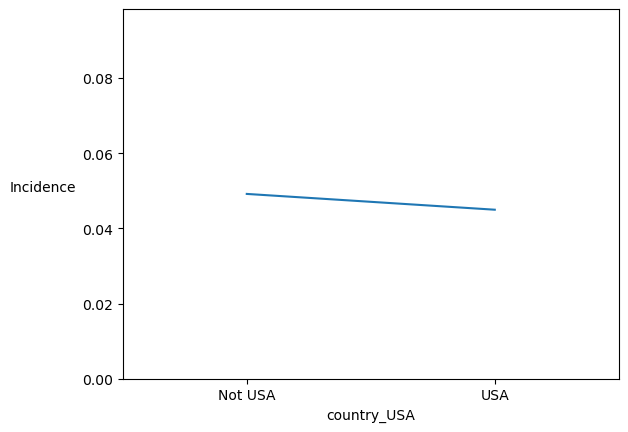

In [272]:
# Plot the Predictor Insight Graph

# The function to plot a predictor insight graph.
def plot_incidence(pig_table, variable):
    
    # Plot the incidence line
    # pig_table[variable]["Incidence"].plot()

    pig_table[variable]["Incidence"].plot()
    
    # Formatting the predictor insight graph
    plt.xticks(np.arange(len(pig_table)), ["Not USA","USA"]) # The labels have to be manually assigned here since it's binary
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylim([0, max(pig_table[variable]["Incidence"]*2)])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="right")
    plt.xlabel(variable)
    
    # # Show the graph
    plt.show()

# Apply the function for the variable "country".
plot_incidence(pig_tables, "country_USA")

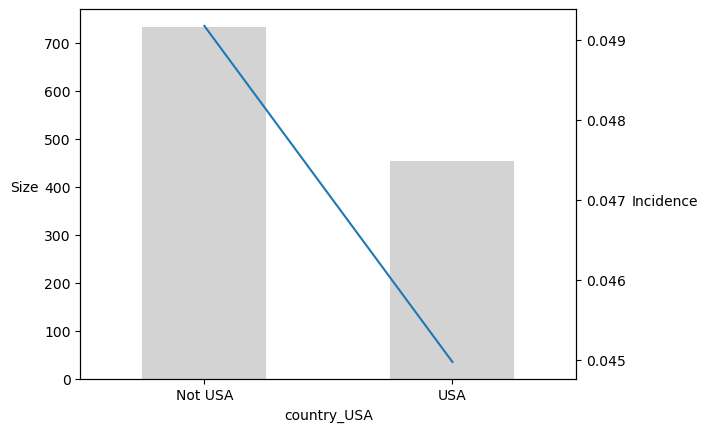

In [278]:
# Plot Pig:

# The function to plot a predictor insight graph
def plot_pig(pig_table, variable):
    
    # Plot formatting
    plt.ylabel("Size", rotation=0, rotation_mode="anchor", ha="right")
    
    # # Plot the bars with sizes 
    pig_table[variable]["Size"].plot(kind="bar", width=0.5, color="lightgray", edgecolor="none") 
    
    # Plot the incidence line on secondary axis
    pig_table[variable]["Incidence"].plot(secondary_y=True)
    
    # Plot formatting
    plt.xticks(np.arange(len(pig_table)), ["Not USA","USA"])  # remember for xticks, you need to pass an np array, like [0,1,2,3]
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="left")
    
    # # Show the graph
    # plt.show()
    
# Apply the function for the variable "country"
plot_pig(pig_tables, "country_USA")